# Figure 5

In [12]:
run doomed.py

In [ ]:
n0 = 100
nsteps = 21
s_range = np.logspace(-3, -1, nsteps)
u_range = np.logspace(-3, -1, nsteps)

In [2]:
def get_matrix(data, n):
    starter = np.zeros((n, n))
    j = 0
    for row in starter:
        z = 0
        for element in row:
            row[z] = data[j][0]
            j += 1
            z += 1
    return starter

def heat_melt(n0, s_range, u_range):
    result = []
    for s in s_range:
        print round(s, 6),
        for u in u_range:
            x, y, a, b = melt(n0, s, u, 4)
            result.append((b, u, s))
    return result

In [3]:
n0 = 100
nsteps = 21
s_range = np.logspace(-3, -1, nsteps)
u_range = np.logspace(-3, -1, nsteps)
meltheat = heat_melt(n0, s_range, u_range)
meltarray = get_matrix(meltheat, nsteps)

0.001 0.001259 0.001585 0.001995 0.002512 0.003162 0.003981 0.005012 0.00631 0.007943 0.01 0.012589 0.015849 0.019953 0.025119 0.031623 0.039811 0.050119 0.063096 0.079433 0.1


In [13]:
cols = sns.color_palette("rocket_r", 21)
colindex = [11, 4, 1]
ss = [.05, .01, .001]
uu = [.00574234, .01, .077911]

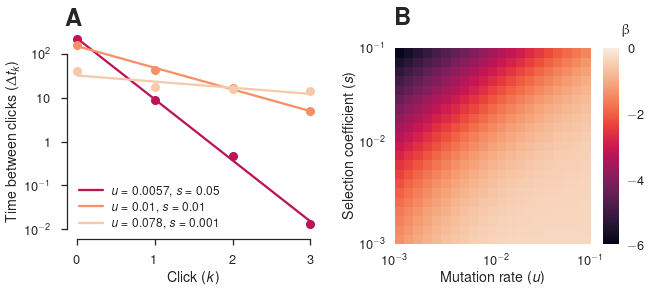

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
fig.subplots_adjust()
sns.set_context("talk")

sns.set_style('ticks')
sns.despine(offset=10)

ax1.set_position([.555, .16, .4, .68])
cbar_ax1 = fig.add_axes([.925, .16, .025, .68])

sns.heatmap(meltarray, square = True, ax=ax1, cbar_ax = cbar_ax1, 
    cbar_kws={'ticks': [0, -2, -4, -6]},
    vmin=-6, vmax=0, cbar=True, cmap='rocket')
ax1.invert_yaxis()
ax1.set_xlabel(r'Mutation rate $(u)$')
ax1.set_ylabel(r'Selection coefficient $(s)$')
ax1.set_xticks([0, 11, 21])
ax1.set_xticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'], rotation = 0)
ax1.set_yticks([0, 11, 21])
ax1.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'], rotation = 0)
ax1.text(0, 23.5, r"\textbf{B}", size=24, weight='bold')
ax1.text(24.8, 22.5, r'$\beta$', size=14.5, ha='center', style='italic')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.tick_params(axis='x', pad=-5)
ax1.tick_params(axis='y', pad=-8)

cbar_ax1.yaxis.set_ticks_position('none')
cbar_ax1.tick_params(axis='y', pad=3)

ax2.set_position([.113, .21, .36, .61])
set_up_axes2(ax2, xmin=0, xmax=3.01, xstep=1, ymin=-2, ymax=2.01, ystep=1, rnd=1, 
    xlabel=r'Click $(k)$', ylabel=r'Time between clicks $(\Delta t_k)$', 
    part_label=r'\textbf{A}')
labels = [r'$u=0.0057, \, s=0.05$', '$u=0.01, \, s=0.01$', '$u=0.078, \, s=0.001$']
for i in range(3):
    x, y, z, b = melt(100, ss[i], uu[i], 4, plot=False)
    ax2.plot(x, np.log10(y), 'o', color=cols[colindex[i]], clip_on=False)
    ax2.plot(x, np.log10(z), color=cols[colindex[i]], clip_on=False, label=labels[i])
    
ax2.legend(bbox_to_anchor=[.66, .31], fontsize=12)
ax2.set_xticklabels(['0', '1', '2', '3'])
ax2.set_yticks([-2, -1, 0, 1, 2])
ax2.set_yticklabels(['$10^{-2}$', '$10^{-1}$', 1, 10, '$10^{2}$'])

plt.savefig('../figures/fig5.pdf')